In [ ]:
import numpy as np

# Grid size
N = 200

# Random initial state
grid = np.random.choice([0, 1], N*N, p=[0.8, 0.2]).reshape(N, N)
    
def compute():
    # Copy grid since we need 8 neighbors for calculation and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # Compute the sum of the 8 neighbors
            total = int((
                grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N]
            ))
            # Apply Conway's rules
            if grid[i, j]  == 1:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = 0
            else:
                if total == 3:
                    newGrid[i, j] = 1
    # Update data
    grid[:] = newGrid[:]
    
    return grid

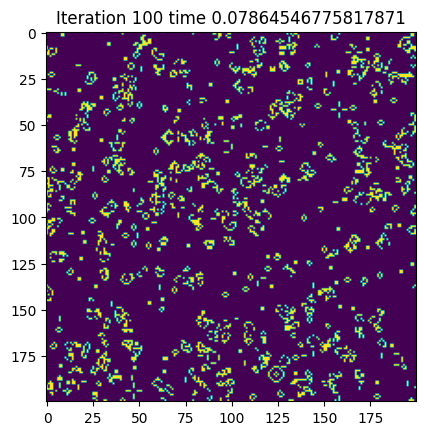

In [ ]:
%matplotlib inline

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

for i in range(100):

    start_time = time.time()
    output = compute()
    processing_time = time.time() - start_time
        
    clear_output(wait=True)
    plt.imshow(output)
    plt.title(f"Iteration {i+1} time {processing_time}")
    plt.show()